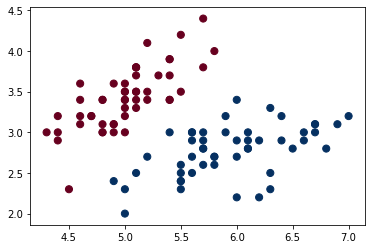

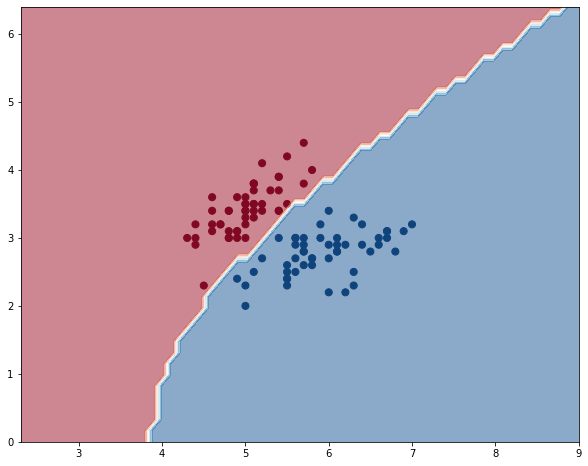

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from matplotlib import pyplot as plt
from sklearn import neighbors, datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:-50, :2]
y = iris.target[:-50]

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

xlim = (min(X[:,0])-2, max(X[:,0])+2)
ylim = (min(X[:,1])-2, max(X[:,1])+2)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

model=SVC(kernel='poly',gamma=10)
model.fit(X,y)
Z =  model.predict(Xgrid)
Z = Z.reshape(xx.shape)
plt.subplots( figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')    
plt.contourf(xx,yy,Z, cmap='RdBu', alpha=0.5)




C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


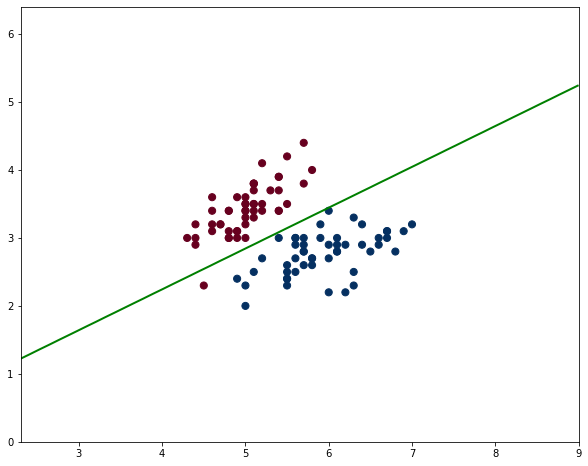

In [29]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X,y)
Z =  model.predict_proba(Xgrid)
Z = Z[:,1].reshape(xx.shape)
plt.subplots( figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')    
plt.contour(xx,yy,Z,[0.5],linewidths=2, colors='green')

In [30]:
from sklearn import linear_model
model=linear_model.SGDClassifier(alpha=0.01, max_iter=100, tol=1e-3)
model.fit(X,y)
Z =  model.predict_proba(Xgrid)
Z = Z[:,1].reshape(xx.shape)
plt.subplots( figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')    
plt.contour(xx,yy,Z,[0.5],linewidths=2, colors='green')

AttributeError: probability estimates are not available for loss='hinge'